<a href="https://colab.research.google.com/github/kangmg/aimDIAS/blob/main/notebooks/aimDIAS_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Tutorials

## Install aimDIAS

### pip install ( recommended )

In [ ]:
!pip install -q aimDIAS

In [ ]:
import aimDIAS
aimDIAS.__version__ # 1.0.1

### git clone ( not recommended )

In [ ]:
# clone repository
!git clone https://github.com/kangmg/aimDIAS

# `git clone` doesn't directly install git lfs files(it contains metadata only). You'll need to manually remove it.
!rm /content/aimDIAS/aimDIAS/models/*

# ( optional ) Manual download. Otherwise, autoDIAS will automatically download the models.
!wget -P /content/aimDIAS/aimDIAS/models -q https://github.com/kangmg/aimDIAS/raw/main/models/aimnet2_b973c_ens.jpt
!wget -P /content/aimDIAS/aimDIAS/models -q https://github.com/kangmg/aimDIAS/raw/main/models/aimnet2_wb97m-d3_ens.jpt

# install dependencies
!pip install -q -r /content/aimDIAS/requirements.txt

!echo "Done!"

In [ ]:
# append path
import sys
sys.path.append("/content/aimDIAS")

In [ ]:
import aimDIAS
aimDIAS.__version__ # 1.0.1

## General Introduction


> ***Docs String***

- To view detailed usage for a function, please check the docstring. You can see the whole parameters via `help(function name)`.

- e.g.
```python
from aimDIAS import aimDIAS_run
> help(aimDIAS_run)
aimDIAS_run(...)
    Description
    -----------
    Performs Activation Strain Model (ASM) & Distortion/Interaction (D/I) analysis on an XYZ trajectory using the AIMNet2 calculator.
    
    Parameters
    ----------
      - trajFile (str) : The trajectory file path or trajectory format string to read.
      - fragments_params[list|dict] : If provided as a dictionary, keys are fragment names and values are fragment data. If provided as a list, it contains fragment data and default names are assigned.
      - mode (str, optional) : The mode of operation can be either `calculation` or `plot`. In `plot` mode, aimDIAS calculations are skipped, and plots with previously calculated results.
      - DIAresultPath (str, optional) : The path to the previously calculated aimDIAS result file. Required when mode is "plot". Default is "aimDIAS_result.json".
      - axis_type (str, optional) : The type of axis for plotting, either "irc", "distance", "angle", or "dihedral". Default is "irc".
      - geo_param (dict | None, optional) : Geometric parameters for the axis. Required when axis_type is specified ( != irc ). Default is None.
      - model (str, optional) : The computational model to use. Default is "b973c".
      - unit (str, optional) : The unit for energy values. ["eV", "Hartree", "kcal/mol", "kJ/mol"] Default is "kcal/mol".
      - include_fragments (bool, optional) : Whether to include fragment energies in the plot. Default is False.
      - relative_idx (None | str | int, optional) : The index for relative energy calculation. Default is 0.
      - plot_highlights (dict, optional) : Highlighting options for the plot. Default is {"marker": False, "linestyle": True}.
      - resultSavePath (str, optional) : The path to save the plot. Default is "./aimDIAS_result.json".
      - horizontal_line (bool, optional) : Whether to include a horizontal line at y=0. Default is True.
      - save_kws (dict, optional) : Additional keywords(`title`,`note`) arguments for saving the results file. Default is {}.
    
    Note
    ----
    Important parameters
    
    1. axis_type, geo_param --> your plot axis type
    2. mode, DIAresultPath  --> plot without calculation
    
    Example
    -------
    >>> fragments_params = {
    ...     "Br-": (-1, [2]),
    ...     "CH3+": (+1, [1, 3, 4, 5]),
    ...     "Cl-": (-1, [6])
    ... }
    >>> aimDIAS_run("trajectory.xyz", fragments_params)
```

In [1]:
import sys
sys.path.append("/workspaces/ML-dias")

!pip install -q -r /workspaces/ML-dias/requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3 -m pip install --upgrade pip






> ***Available models***

In [2]:
from aimDIAS import models
models()


- Supported models

      Abbr.     |      Full Name           |  Recommended
    ________________________________________________________
      b0        | aimnet2_b973c_0.jpt      |
      b1        | aimnet2_b973c_1.jpt      |
      b2        | aimnet2_b973c_2.jpt      |
      b3        | aimnet2_b973c_3.jpt      | 
      b973c     | aimnet2_b973c_ens.jpt    |   * (default)
      w0        | aimnet2_wb97m-d3_0.jpt   |
      w1        | aimnet2_wb97m-d3_1.jpt   |
      w2        | aimnet2_wb97m-d3_2.jpt   |
      w3        | aimnet2_wb97m-d3_3.jpt   |
      wb97m-d3  | aimnet2_wb97m-d3_ens.jpt |   *
    ________________________________________________________

[Note] 
- Both `Abbr.' and `Full Name` are supported.
- The ensemble models( `b973c`,  `wb97m-d3`) are included in the aimDIAS package. However, other models will be automatically downloaded when they are called.




Two ensemble models, `b973c` and `wb97m-d3`, consist of four individual models. As a result, the calculation time is much slower (about four times slower), but the accuracy is also much higher.


> ***Contributes this project***

-   💡 Please share your XYZ traj file with other users.

-   ✏️ The shared file will be uploaded to the `samples/` directory along with your GitHub ID in` samples/samples.txt` for reference.

> ***HOW TO***

-   🔗 If you've uploaded your file on [github discussion page](https://github.com/kangmg/aimDIAS/discussions/2), then I will add it.


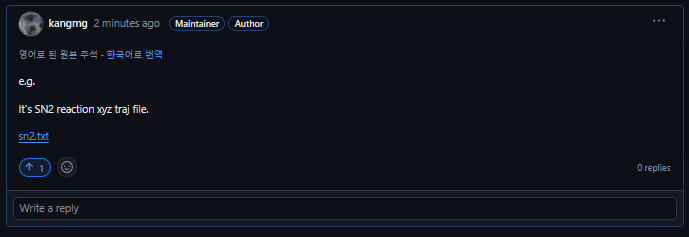


## Load Sample data

In [3]:
from aimDIAS import available_data, load_data

available_data()

________________________________________________________
Data Name         |   Description
__________________|_____________________________________
sn2.xyz           |   sn2 reaction 
wittig.xyz        |   wittig reaction
DA.xyz            |   diels alder reaction
fluoroethane.xyz  |   unimolecular thermal decomposition
__________________|_____________________________________



In this tutorial, we'll download and use `sn2.xyz`.

In [4]:
# download file
load_data("sn2.xyz", save_file=True)

# (optional) show download traj file
xyz = load_data("sn2.xyz")
print(xyz)

sn2.xyz file saved in ./sn2.xyz
 6
 0.000000
  C -1.277168 0.545365 -0.000063
  Br 0.648058 0.543727 0.000199
  H -1.652166 0.593222 1.017641
  H -1.652215 -0.359651 -0.467952
  H -1.651698 1.403205 -0.550042
  Cl -4.402752 0.572053 0.000227
 6
 0.000000
  C -1.294919 0.542959 0.001299
  Br 0.694616 0.543808 -0.000438
  H -1.636980 0.598072 1.030309
  H -1.637355 -0.369230 -0.477817
  H -1.633737 1.408958 -0.553873
  Cl -4.352783 0.570770 0.000338
 6
 0.000000
  C -1.315835 0.540982 0.002430
  Br 0.737905 0.544117 -0.001198
  H -1.623462 0.601663 1.042079
  H -1.624161 -0.378494 -0.486125
  H -1.618359 1.414529 -0.557551
  Cl -4.306244 0.570083 0.000092
 6
 0.000000
  C -1.339677 0.539417 0.003342
  Br 0.778164 0.544540 -0.002007
  H -1.611638 0.604179 1.052782
  H -1.612659 -0.387212 -0.492968
  H -1.605420 1.419807 -0.561005
  Cl -4.262904 0.569876 -0.000429
 6
 0.000000
  C -1.366581 0.538239 0.004055
  Br 0.815256 0.544987 -0.002802
  H -1.601896 0.605824 1.062287
  H -1.603235 -0.

In [5]:
# (optional) check number of IRC points.
from aimDIAS import read_traj

traj = read_traj("sn2.xyz")

print("Number of IRC points : ", len(traj))

Number of IRC points :  20



<br/>

> ***traj format capatibility***


```
# h2.xyz

  2

  H 0 0 0
  H 0 0 1
  
  2

  H 0 0 0
  H 0 0 2

```

aimDIAS inherently supports both format : ***file_path*** / ***xyz_raw_string***
- xyz_raw_string
  - e.g. `draw_xyz("2\n\n H 0 0 0\n H 0 0 1\n\n 2\n\n H . . .")`


- file_path of traj files
  - e.g. `draw_xyz("h2.xyz")`



In [6]:
# check your molecule
from aimDIAS import draw_xyz

# first xyz in traj
draw_xyz("sn2.xyz", charge=-1, idx=0)

# Note: The rdkit bond determination module may not be stable with TS.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
draw_xyz(xyz, charge=-1, idx=-1)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.


## Fragmentation of molecule



various fragmentations are possible
```
[ Br-CH3 ]     [ Cl ]

[ Br ] [ CH3 ] [ Cl ]

[ Br ]     [ CH3-Cl ]
```


Two posibble fragmentations are

-  n=3 fragmentation
  - [ Br ]^-  
  - [ CH3 ]^+  
  - [ Cl ]^-


-  n=2 fragmentation
  - [ Br-CH3 ]
  - [ Cl ]^-



---


***Future Release Note***

- The `auto-fragmentation` will be implemented in a future version.
- Hence, a more user-friendly `fragmentation GUI` will be implemented.
- In the beta release(v. 1.0.1), user need to specify fragments_params manually.

---



> **How to write `fragments_params`**

- fragments_params:dict
```python
# fragmentation with names
fp_n3 = {
  "Br-"   : (-1, [2]),
  "CH3+"  : (+1, [1,3,4,5]),
  "Cl-"   : (-1, [6])
}
```

- fragments_params: [list | tuple]
```python
# fragmentation without names --> use default names
fp_n2 = [
    (0, [1, 2, 3, 4, 5]), # Br-CH3
    (-1, [6]) # Cl-
]
```

## Run calculations | sn2 reaction

aimDIAS CALCULATION TERMINATED NORMALLY


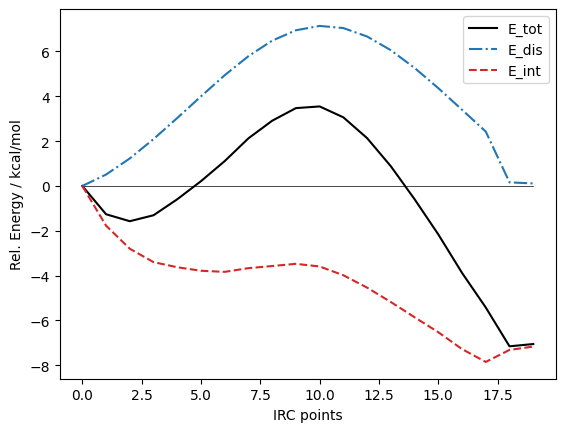

In [8]:
from aimDIAS import aimDIAS_run
from aimDIAS import Calculator

calc = lambda : Calculator(charge=-1, model='b973c') # ase calculator
# fragments_params
fp_n3 = {
  "Br-"   : (-1, [2]),
  "CH3+"  : (+1, [1,3,4,5]),
  "Cl-"   : (-1, [6])
}

aimDIAS_run(Calculator=calc, trajFile="sn2.xyz",
            fragments_params=fp_n3)

# Runtime: only 4 mins for SN2 D/I analysis(n_frags=3) with 20 IRC points

aimDIAS CALCULATION TERMINATED NORMALLY


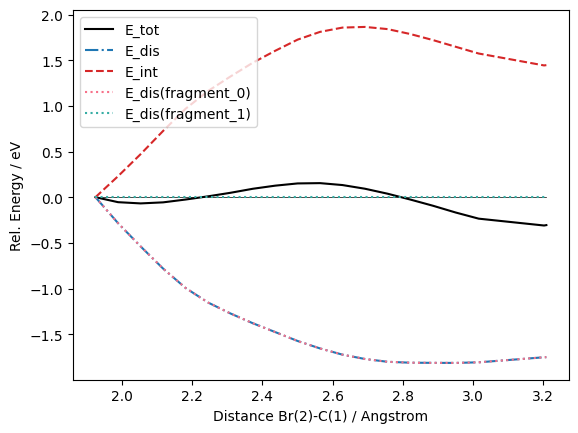

In [9]:
# fragments_params
fp_n2 = [
    (0, [1, 2, 3, 4, 5]), # Br-CH3
    (-1, [6]) # Cl-
]

# plot setting
unit               = "eV"        # "kJ/mol", "Hatree", "kcal/mol", "eV"
relative_idx       = 0           # min, 0 etc
include_fragments  = True        # plot distortion energies of each fragments
axis_type          = "distance"  # "angle", "dihedral"

# axis setting
gp = {"distance" : [2, 1]} # distance (C-Br)


aimDIAS_run(trajFile="sn2.xyz",
            fragments_params=fp_n2,
            geo_param=gp,
            axis_type=axis_type,
            include_fragments=include_fragments,
            relative_idx=relative_idx,
            unit=unit,
            Calculator=calc)

# Runtime: only 3~4 mins for SN2 D/I analysis(n_frags=2) with 20 IRC points

# Worked Examples

## Worked Example 1 | Diels Alder RXN

In [10]:
available_data()

________________________________________________________
Data Name         |   Description
__________________|_____________________________________
sn2.xyz           |   sn2 reaction 
wittig.xyz        |   wittig reaction
DA.xyz            |   diels alder reaction
fluoroethane.xyz  |   unimolecular thermal decomposition
__________________|_____________________________________



In [11]:
load_data("DA.xyz", save_file=True)

# chuck IRC points
num_irc = len(read_traj("DA.xyz"))
print(f"\nNumber of IRC points : {num_irc}\n")

# first xyz in traj
first_DA_xyz = read_traj("DA.xyz", returnString=True)[0]
print(first_DA_xyz)

DA.xyz file saved in ./DA.xyz

Number of IRC points : 101

26
0 1 0.058933 
C        0.9349010        0.9463030       -1.2660590
C        2.2953520        0.4281850       -1.1406570
C        0.2427550        1.5144260       -0.2710250
H        0.4247480        0.8092610       -2.2156840
C        3.1729770        0.6849540       -0.1628570
H        2.5950450       -0.2580340       -1.9305820
C        0.3346910       -1.0921900        1.5141860
C        1.6098140       -1.4722620        1.5374220
H        2.9595400        1.3847450        0.6410700
H        4.1484200        0.2104100       -0.1483480
H        2.2599410       -1.2543400        2.3783860
H        2.0259160       -2.0185250        0.6972520
H        0.6543010        1.6475830        0.7303670
H       -0.1351160       -0.5438150        2.3251780
O       -1.0229030        1.9595960       -0.4521950
C       -1.7022290        2.3078960        0.7393210
H       -2.6790260        2.6897800        0.4409520
H       -1.8333380     

In [12]:
draw_xyz(first_DA_xyz)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
# last xyz in traj --> idx = -1
draw_xyz("DA.xyz", idx=-1)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
# fragments_params
fp_DA = {
    "diene"        : (0, [7,8,11,12,14,20,21,22,23,24,25,26]),
    "dienophile"   : (0, [1,2,3,4,5,6,9,10,13,15,16,17,18,19])
    }

# parameters
resultSavePath = "./DA_result.json"   # filename to save
include_fragments=True                # show fragmets distortion energy
relative_idx=0                        # relative energy reference
unit="Hartree"                        # energy unit -- HArTrEe harTREE both possible


aimDIAS_run(trajFile="DA.xyz",
            fragments_params=fp_DA,
            include_fragments=include_fragments,
            relative_idx=relative_idx,
            unit=unit,
            resultSavePath=resultSavePath,
            Calculator=calc)

# Runtime: only ~30 mins for Diels Alder D/I analysis(n_frags=2) with 101 IRC points

Processing . . .  
  32.67%  |======>              |  33 / 101

Optimizer : optimizing diene
      Step     Time          Energy          fmax
BFGS:    0 17:10:59    -8334.977585        4.664043
BFGS:    1 17:11:03    -8335.130542        3.553742
BFGS:    2 17:11:07    -8335.253964        0.432964
BFGS:    3 17:11:07    -8335.263651        0.318799
BFGS:    4 17:11:07    -8335.281570        0.439124
BFGS:    5 17:11:07    -8335.295279        0.310533
BFGS:    6 17:11:07    -8335.302430        0.272757


KeyboardInterrupt: 

<br/>

> ***Plot previously calculated result without calcualtion***



***key parameters***

  - `DIAresultPath` : json file path *#contains caculation result & meta_data*

  - `mode` : 'plot' *#default is 'calculation'*

In [ ]:
# change mode "calculation"(default) --> "plot" , result filepath
mode="plot"
DIAresultPath="./DA_result.json"

# plot option
unit="ev"
relative_idx = -1

# axis option
axis_type="distance"
gp_DA = {"distance" : [5, 8]}

aimDIAS_run(trajFile="DA.xyz",
            fragments_params=fp_DA,
            mode=mode,
            geo_param=gp_DA,
            axis_type=axis_type,
            include_fragments=True,
            relative_idx=relative_idx,
            unit=unit,
            DIAresultPath=DIAresultPath,
            Calculator=calc)

<br/>

> ***axis validation*** (optional)

- **monotonic curve** --> *valid axis*
- **non-monotonic curve** --> *invalid axis*

In [ ]:
# axis vailidation
import matplotlib.pyplot as plt
from aimDIAS import geometric_parameter

# distance axis
gp_DA = {"distance" : [5, 8]}
distance_IRC = geometric_parameter("DA.xyz", gp_DA)
#IRC
IRC = [irc for irc in range(0, len(distance_IRC))]

plt.plot(IRC, distance_IRC, marker="x", markersize=3, color="skyblue")
plt.title("IRC vs. distance (axis validation)")
plt.xlabel("IRC")
plt.ylabel("distance C5-C8 / A")

In [ ]:
# custom plot #

import json
from aimDIAS import DIASparser
from aimDIAS import geometric_parameter

# read previously calculated result file
DA_json = json.load(open("/content/DA_result.json"))["result"]

# parsing results
E_tot = DIASparser(DA_json, fragType="molecule", energyType = "total", relative_idx="min")
E_dis = DIASparser(DA_json, fragType="molecule", energyType = "distortion", relative_idx="min")
E_int = DIASparser(DA_json, fragType="molecule", energyType = "interaction", relative_idx="min")
frag1_dis = DIASparser(DA_json, fragType="diene", energyType = "distortion", relative_idx="min")
frag2_dis = DIASparser(DA_json, fragType="dienophile", energyType = "distortion", relative_idx="min")

# IRC
num_irc = len(read_traj("DA.xyz"))
IRC = [irc for irc in range(0, num_irc)]

# distance_xaxis
'''
gp_DA = {"distance" : [5, 8]}
distance_xaxis = geometric_parameter("DA.xyz", gp_DA)
'''

# plot
plt.plot(IRC, E_tot, label="E_tot")
plt.plot(IRC, E_dis, label="E_dis")
plt.plot(IRC, E_int, label="E_int")
plt.plot(IRC, frag1_dis, label="E_dis(diene)")
plt.plot(IRC, frag2_dis, label="E_dis(dienophile)")
plt.legend()

plt.title("custom calculation")
plt.xlabel("IRC")
plt.ylabel("Rel. Energy / kcal/mol")

plt.show()

## Worked Example 2  |  wittig RXN

In [ ]:
load_data("wittig.xyz", save_file=True)

num_irc = len(read_traj("wittig.xyz"))
print(f"\nNumber of IRC points : {num_irc}\n")

# first xyz in traj
first_wittig_xyz = read_traj("wittig.xyz", returnString=True)[0]
print(first_wittig_xyz)

In [ ]:
draw_xyz(first_wittig_xyz)

<br/>

> ***Automatate Run***

In [ ]:
fp_wittig = {
    "frag_1"   :  (  0, [1,2,5, 39, 40, 41, 42, 43, 44, 45, 46, 47]   ),
    "frag_2"   :  (  0, [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]   )
    }

aimDIAS_run("wittig.xyz",
            fragments_params=fp_wittig,
            include_fragments=True,
            relative_idx = 0)

# Runtime: only ~31 mins for wittig RXN D/I analysis(n_frags=2) with 79 IRC points

<br/>

> ***Manual Run*** (Not Recommended)

In [ ]:
from aimDIAS import trajDIAS

# parameters
fp_wittig = {
    "frag_1"   :  (  0, [1,2,5, 39, 40, 41, 42, 43, 44, 45, 46, 47]   ),
    "frag_2"   :  (  0, [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]   )
    }

# run DIAS
DIASresult = trajDIAS("wittig.xyz", fragments_params=fp_wittig)

E_tot = DIASparser(DIASresult, fragType="molecule", energyType = "total", relative_idx=0, )
E_dis = DIASparser(DIASresult, fragType="molecule", energyType = "distortion", relative_idx=0)
E_int = DIASparser(DIASresult, fragType="molecule", energyType = "interaction", relative_idx=0)
frag1_dis = DIASparser(DIASresult, fragType="frag_1", energyType = "distortion", relative_idx=0)
frag2_dis = DIASparser(DIASresult, fragType="frag_2", energyType = "distortion", relative_idx=0)

# geometric paramter
IRC = DIASparser(DIASresult, fragType="irc")

# plot
plt.plot(IRC, E_tot, label="E_tot")
plt.plot(IRC, E_dis, label="E_dis")
plt.plot(IRC, E_int, label="E_int")
plt.plot(IRC, frag1_dis, label="E_dis(frag1)")
plt.plot(IRC, frag2_dis, label="E_dis(frag2)")
plt.legend()

plt.xlabel("IRC point")
plt.ylabel("Rel. Energy / kcal/mol")

plt.show()

# Runtime: only ~31 mins for wittig RXN D/I analysis(n_frags=2) with 79 IRC points